# Preamble

In [1]:
import numpy as np
import spinmob as s

Load in data (1=rigel, 2=joseph, 3=miles) and convert inches to cm:

In [2]:
datafilenames = ["calibration_data"+str(i)+".csv" for i in range(1, 4)]
calibration_datas = [s.data.load(datafilename) for datafilename in datafilenames]
added_voltage_error = 0.05
inch_to_cm = 2.54
for calibration_data in calibration_datas:
    calibration_data[0] *= inch_to_cm
    calibration_data[2] *= inch_to_cm
    calibration_data[3] += added_voltage_error

Extra ckey: error
Extra ckey: Voltage
Extra ckey: errors
Extra ckey: Height
Extra ckey: error
Extra ckey: Voltage
Extra ckey: errors
Extra ckey: Height
Extra ckey: error
Extra ckey: Voltage
Extra ckey: measurements?)
Extra ckey: bad
Extra ckey: to
Extra ckey: due
Extra ckey: 0.003
Extra ckey: to
Extra ckey: up
Extra ckey: take
Extra ckey: (maybe
Extra ckey: errors
Extra ckey: Height


Convert to relative heights:

In [3]:
for calibration_data in calibration_datas:
    calibration_data[0] -= np.max(calibration_data[0])
    calibration_data[0] *= -1
    calibration_data[2] *= 2

Adapting ranges so they are all overlapping:

In [4]:
for j in range(3):
    max_range = np.argmin(np.abs(calibration_datas[j][0] - 0.4))+1
    for i in range(4):
        calibration_datas[j][i] = calibration_datas[j][i][:max_range]

Generate plots for each:

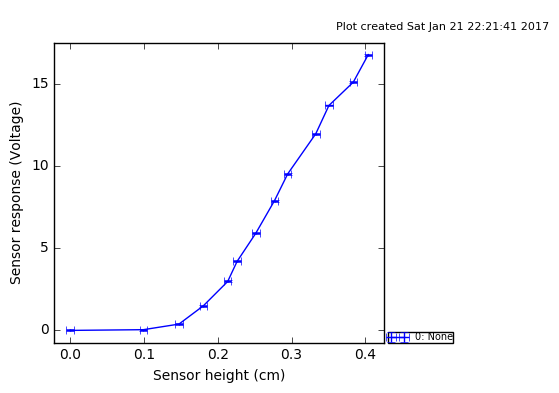

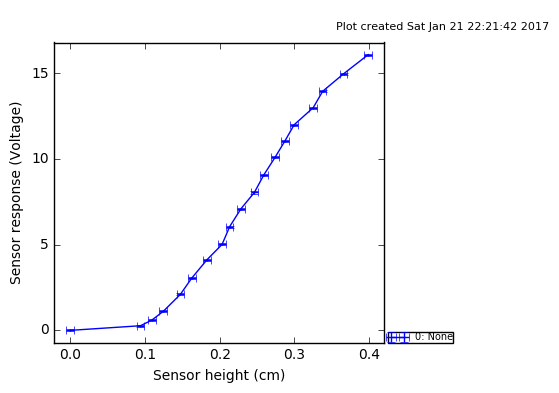

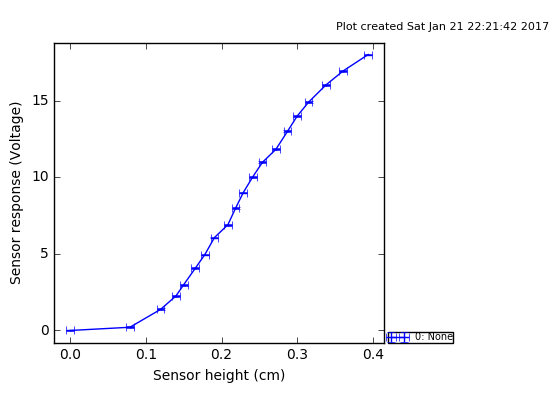

In [7]:
for i, calibration_data in enumerate(calibration_datas):
    fig = s.pylab.figure()
    ax = fig.add_axes([0,0,1,1])
    s.plot.xy.data(
        xdata=calibration_data[0], ydata=calibration_data[1],
        exdata=calibration_data[2], eydata=calibration_data[3],
        xlabel="Sensor height (cm)", ylabel="Sensor response (Voltage)")
    s.pylab.savefig("calibration_curve"+str(i+1)+".pdf", bbox_inches='tight')

Try to produce some linear fits:

In [ ]:
np.load('results_of_linear_fits.npy')

In [ ]:
def obtain_fit_results(calibration_data):
    fit_results = []
    for start in range(0, 8):
        for length in range(3, 7):
            my_fitter = s.data.fitter(f='a*x + b', p='a, b')
            length_of_regression = length
            start_of_regression = start
            end_of_regression = start_of_regression + length_of_regression
            my_fitter.set_data(
                xdata=calibration_data[0][start_of_regression:end_of_regression],
                ydata=calibration_data[1][start_of_regression:end_of_regression],
                exdata=calibration_data[2][start_of_regression:end_of_regression],
                eydata=calibration_data[3][start_of_regression:end_of_regression])
            my_fitter.fit()
            chi_squared = my_fitter.reduced_chi_squareds()[0]
            fit_results.append([start, length, chi_squared])
    return fit_results

In [ ]:
fit_results = np.array(fit_results)
smallest_chi_square = np.argmin(fit_results[:, 2])
print("The best chi-squared is", 
      fit_results[smallest_chi_square, 2],
      "for position", fit_results[smallest_chi_square, :2])
start_position = fit_results[smallest_chi_square, 0]
length = fit_results[smallest_chi_square, 1]
print("This voltage is",
      calibration_data[1][start_position],
      "to",
      calibration_data[1][start_position+length])

In [ ]:
my_fitter = s.data.fitter(f='a*x + b', p='a, b')
length_of_regression = length
start_of_regression = start_position
end_of_regression = start_of_regression + length_of_regression
my_fitter.set_data(
    xdata=calibration_data[0][start_of_regression:end_of_regression],
    ydata=calibration_data[1][start_of_regression:end_of_regression],
    exdata=calibration_data[2][start_of_regression:end_of_regression],
    eydata=calibration_data[3][start_of_regression:end_of_regression])
my_fitter.fit()